In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [24]:
E_commerce_data = pd.read_csv("F:\\@BDA\\PDS\\PROJECT\\SURVEY_DATA_ON_ECOMMERCE_SITES.csv")

In [25]:
E_commerce_data

,Timestamp,Age,Gender,Highest Educational Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10/4/2021 16:24:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10/5/2021 10:27:02,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10/5/2021 11:15:06,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10/5/2021 11:26:37,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10/5/2021 16:43:34,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11/29/2021 18:48:15,20,Male,Graduate,Yes,"Electronics, Garments, Educational Materials, ...",4,No,4,Some times,Online Price is greater,5,7,14,Flipkart,Myntra,Grofers,NaN,NaN
122,11/29/2021 18:50:33,21,Female,Graduate,Yes,"Electronics, Educational Materials",3,No,4,Some times,Almost same,5,9,15,Others,Meesho,Big Basket,NaN,NaN
123,11/29/2021 18:53:39,27,Female,Post Graduate and above,Yes,"Electronics, Garments",5,No,5,Never,Almost same,4,12,24,Flipkart,Myntra,Grofers,NaN,NaN
124,11/29/2021 20:31:25,34,Female,Post Graduate and above,Yes,Electronics,4,Yes,4,Never,Online Price is greater,4,8,16,Amazon,Meesho,Amazon,NaN,NaN


In [26]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you prefer others for online shopping?":"Preference"}, axis = 1)

In [27]:
data = pd.DataFrame(columns=["Qualification", "Preference", "Count"])

In [28]:
data.Qualification = E_commerce_data.Qualification
data.Preference = E_commerce_data.Preference
data.Count = 1

In [29]:
data

,Qualification,Preference,Count
0,Graduate,5,1
1,Graduate,4,1
2,Graduate,4,1
3,Graduate,5,1
4,Higher Secondary,4,1
...,...,...,...
121,Graduate,5,1
122,Graduate,5,1
123,Post Graduate and above,4,1
124,Post Graduate and above,4,1


In [30]:
grouped_data = data.groupby(["Qualification", "Preference"]).sum(); grouped_data

Count
Qualification           Preference       
Graduate                1               1
                        2               2
                        3              20
                        4              42
                        5              15
Higher Secondary        3               5
                        4              12
                        5               4
Post Graduate and above 0               1
                        3               5
                        4               4
                        5               6
Secondary               2               1
                        3               3
                        4               2
                        5               3

In [31]:
data2 = pd.DataFrame(columns=["Qualification", "Preference"])
row_list = []
for i,j in grouped_data.index:
    dict1 = {}
    dict1.update({"Qualification": i, "Preference":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1
df1["count"]  = list(grouped_data.Count); df1

,Qualification,Preference,count
0,Graduate,1,1
1,Graduate,2,2
2,Graduate,3,20
3,Graduate,4,42
4,Graduate,5,15
5,Higher Secondary,3,5
6,Higher Secondary,4,12
7,Higher Secondary,5,4
8,Post Graduate and above,0,1
9,Post Graduate and above,3,5


In [32]:
df2 = pd.DataFrame(0,columns=[0,1,2,3,4,5], index = ["Secondary", "Higher Secondary", "Graduate", "Post Graduate and above"])

In [34]:
k = 0
for i,j in zip(list(df1.Qualification), list(df1.Preference)):
    df2.at[str(i),j] = df1["count"][k]
    k = k+1

In [35]:
df2 = df2.div(df2.sum(axis=1), axis = 0)

In [36]:
df2 = df2*100

In [37]:
df2

,0,1,2,3,4,5
Secondary,0.00,0.00,11.111111,33.333333,22.222222,33.333333
Higher Secondary,0.00,0.00,0.000000,23.809524,57.142857,19.047619
Graduate,0.00,1.25,2.500000,25.000000,52.500000,18.750000
Post Graduate and above,6.25,0.00,0.000000,31.250000,25.000000,37.500000


In [38]:
 df2['Qualification'] = list(df2.index); df2

,0,1,2,3,4,5,Qualification
Secondary,0.00,0.00,11.111111,33.333333,22.222222,33.333333,Secondary
Higher Secondary,0.00,0.00,0.000000,23.809524,57.142857,19.047619,Higher Secondary
Graduate,0.00,1.25,2.500000,25.000000,52.500000,18.750000,Graduate
Post Graduate and above,6.25,0.00,0.000000,31.250000,25.000000,37.500000,Post Graduate and above


In [39]:
for i,j in zip(list(df1.Qualification), list(df1.Preference)):
    print("i = " ,i, "j = ",j)

i =  Graduate j =  1
i =  Graduate j =  2
i =  Graduate j =  3
i =  Graduate j =  4
i =  Graduate j =  5
i =  Higher Secondary j =  3
i =  Higher Secondary j =  4
i =  Higher Secondary j =  5
i =  Post Graduate and above j =  0
i =  Post Graduate and above j =  3
i =  Post Graduate and above j =  4
i =  Post Graduate and above j =  5
i =  Secondary j =  2
i =  Secondary j =  3
i =  Secondary j =  4
i =  Secondary j =  5


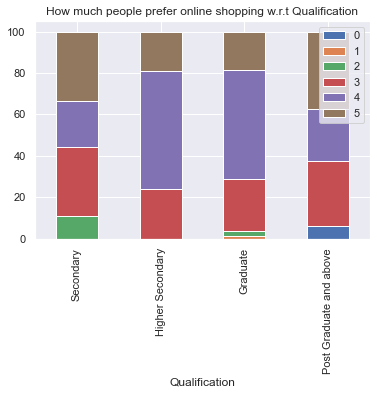

In [40]:
df2.plot(x="Qualification", kind='bar', stacked=True,
        title='How much people prefer online shopping w.r.t Qualification')
plt.savefig("9(b).png")